# Introduction to Signals Processing using Python (Part 3) 
In this part, you will learn how to plot sampled signals using matplotlib's plotting functionality. Also, you will learn how to properly define the time and frequency axis which will define be used as x-axis of many of your plots. 

 

## Matplotlib 
[Matplotlib](http://matplotlib.org/index.html) is a python library for creating 2D plots from numpy arrays. It was started as a library to emulate MATLAB's plot functionality and syntax, but it has grown beyond its humble beginning to now offer a full fledged object-oriented 2D plotting library. Matplotlib is designed with the philosophy that one should be able to create simple plots with just a few commands. Yet, one should be able to do all the required fine-tuning, if one so desires, by going deeper into the library. 

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib “state-machine environment” which is provided by the $matplotlib.pyplot$ module. Pyplot’s state-machine environment behaves similarly to MATLAB and should be familiar to users with MATLAB experience.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions <sup> [1][1]</sup>.

For even more control – which is essential for things like embedding matplotlib plots in GUI applications – the pyplot level may be dropped completely, leaving a purely object-oriented approach <sup> [1][1]</sup>. We will not cover this aspect of matplotlib in this tutorial. 

See below a sample example for using pyplot. 


[1]: http://matplotlib.org/faq/usage_faq.html

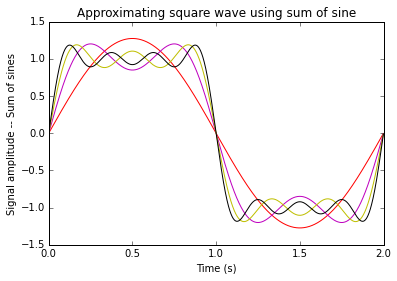

In [26]:
from matplotlib import pyplot as plt # Conventionally advised 
import numpy as np 
from numpy import pi as Pi 


Ts = 0.001 # 1 KHz sampling rate 
T = 2 # 4 sec sample
t= np.arange(0,T,Ts) # linear space between 0

sig1 = (4/Pi)*np.sin((Pi)*t)
sig2 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) 
sig3 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)
sig4 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)+(4/(7*Pi))*np.sin(7*Pi*t)


plt.plot(t,sig1,'r-')
plt.plot(t,sig2,'m-')
plt.plot(t,sig3,'y-')
plt.plot(t,sig4,'k-')

plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude -- Sum of sines')
plt.title('Approximating square wave using sum of sine ')



If you forget about $plt$ prefix before $plot$ for the time being, then all commands above are similar to MATLAB plotting commands.

Plotting library based on pyplot remembers the state. So, once you call the first plot function, a **figure** object is automatically created in the background. You can think of figure object as a logical representation of the complete figure above. Each subsequent call to $plot$ refers to the same figure created with the first call to $plot$, and automatically plots in that figure unless you specifically ask it to create a new figure using 

```python
plt.figure()
```
Then, subsequent call to $plot$ will plot in the newly created figure. This is similar to MATLAB. 

Further, $subplot(numRow,numCol,subID)$ can be called to create figures having multiple subplots. 

 

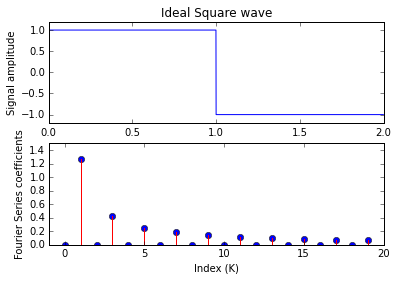

In [41]:
import scipy.signal as signal # 


Ts = 0.001 # 1 KHz sampling rate 
T = 2 # 2 sec sample
t= np.arange(0,T,Ts) # 

square = signal.square(t*Pi)



K = np.arange(20)
C_k = np.array([0 if k%2==0 else 4.0/(k*Pi) for k in K])

plt.subplot(2,1,1)
plt.plot(t,square)

plt.title('Ideal Square wave')
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.axis([0,2,-1.2,1.2])

plt.subplot(2,1,2)
plt.stem(K, C_k,'r')
plt.xlabel('Index (K)')
plt.ylabel('Fourier Series coefficients')
plt.axis([-1,20, 0, 1.5])
plt.show()

$subplot(2,1,1)$ created a $2$-row, $1$-column subplot, and then the last $1$ refers to which subplot is currently active. Subsequent call to $plot$ will automatically plot in that subplot. 

For further details on $pyplot$ style MATLAB-like plotting, you can refer to [pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html). 

### Parts of a figure (OOP)
![Parts of a figure](http://matplotlib.org/_images/fig_map.png)
<center>Adopted from Matplotlib website</center>

This figure shows the hierarchical organization of relevant objects in matplotlib environment. This should act as your gateway to any further fine-tuning needed in your plots. Think of figure as a logical representation of every aspect of the plots drawn above. Figure contains **axes** object (The x-y plane above). The first figure instance contain only one axes object, the second figure contains two axes object. Each axes object can have multiple **axis** (e.g. x-axis, y-axis, ..) and they are the number line-like objects above. These axis objects can be used to change the ticks, tick labels, text orientation etc. 

Everything you can see on the figure is an **artist**. This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another <sup>[2][2]</sup>. 

We will not go in systematic detail of how to configure these figure parts, but you are welcome to explore further in [2][2]. I will make use of some aspect of object oriented API when needed, and will explain them if needed. 

[2]: http://matplotlib.org/faq/usage_faq.html

# Defining time and frequency axis
<mark> Work in Progress </mark>